
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [382]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

RANDOM_STATE = 17

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [383]:

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

La tarea es predecir el número de juntas tóricas que experimentarán
    angustia térmica para un vuelo dado cuando la temperatura de lanzamiento es
    bajo cero.

6. Número de atributos: 5
      1. Número de juntas tóricas en riesgo en un vuelo determinado
      2. Número que experimenta problemas térmicos
      3. Temperatura de lanzamiento (grados F)
      4. Presión de verificación de fugas (psi)
      5. Orden temporal de vuelo

In [384]:
my_data.head()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6


In [385]:
my_data.shape

(22, 5)

In [386]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Number of O-rings at risk on a given flight  22 non-null     int64
 1   Number experiencing thermal distress         22 non-null     int64
 2   Launch temperature (degrees F)               22 non-null     int64
 3   Leak-check pressure (psi)                    22 non-null     int64
 4   Temporal order of flight                     22 non-null     int64
dtypes: int64(5)
memory usage: 1008.0 bytes


In [387]:
my_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
count,22.00,22.00,22.00,22.00,22.00
mean,6.00,0.41,69.73,156.82,12.50
std,0.00,0.67,7.18,66.00,6.49
min,6.00,0.00,53.00,50.00,2.00
25%,6.00,0.00,67.00,100.00,7.25
50%,6.00,0.00,70.00,200.00,12.50
75%,6.00,1.00,75.00,200.00,17.75
max,6.00,2.00,81.00,200.00,23.00


In [388]:
columnas = list(my_data.columns.values)
for column in columnas:
  frecuencia= my_data[column].value_counts()
  print(frecuencia)
  print("===========================================")

6    22
Name: Number of O-rings at risk on a given flight, dtype: int64
0    15
1     5
2     2
Name: Number experiencing thermal distress, dtype: int64
70    4
67    3
76    2
75    2
63    1
58    1
57    1
53    1
81    1
79    1
78    1
73    1
72    1
69    1
68    1
Name: Launch temperature (degrees F), dtype: int64
200    15
50      5
100     2
Name: Leak-check pressure (psi), dtype: int64
23    1
22    1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
2     1
Name: Temporal order of flight, dtype: int64


In [389]:
#Determinar nulos en las variables de entrada
my_data.isnull().sum()

Number of O-rings at risk on a given flight    0
Number experiencing thermal distress           0
Launch temperature (degrees F)                 0
Leak-check pressure (psi)                      0
Temporal order of flight                       0
dtype: int64

In [390]:
def boxplot(df,column):
    plt.figure(figsize=(15,7))
    sns.boxplot(df[column])
    plt.title('Boxplot para {}'.format(column), fontsize='xx-large')
    plt.show()


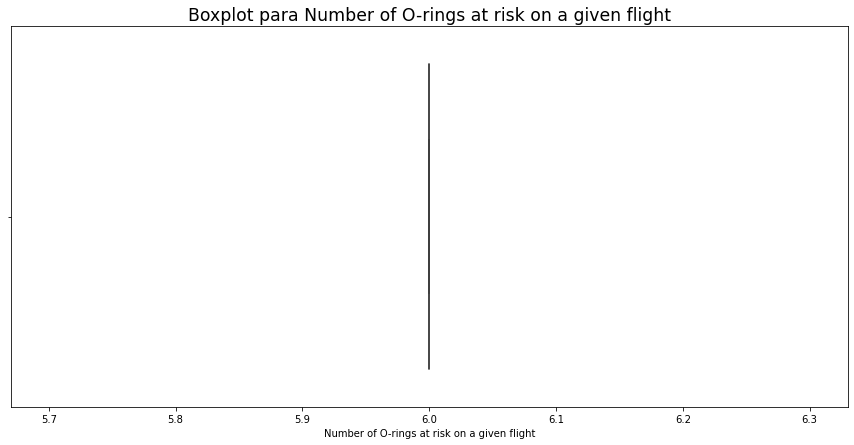

In [391]:
boxplot(my_data,"Number of O-rings at risk on a given flight" )

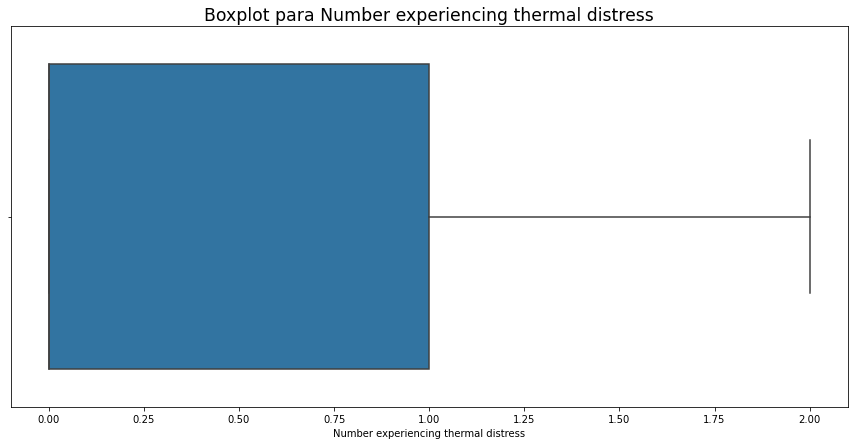

In [392]:
boxplot(my_data,"Number experiencing thermal distress" )

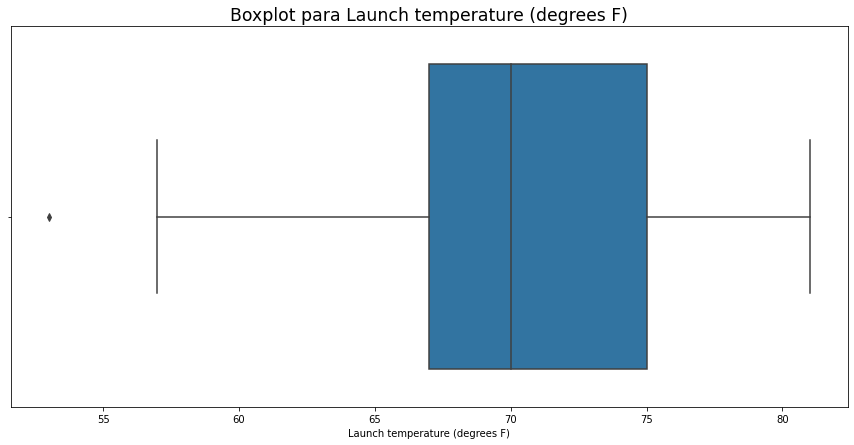

In [393]:
boxplot(my_data,"Launch temperature (degrees F)" )

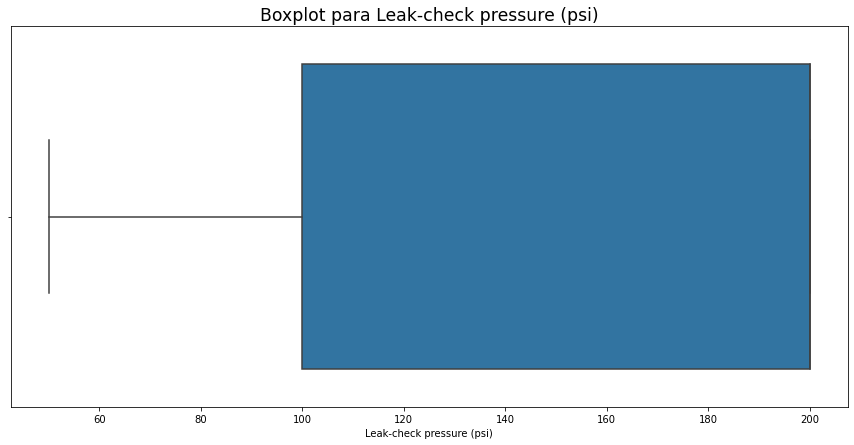

In [394]:
boxplot(my_data,"Leak-check pressure (psi)" )

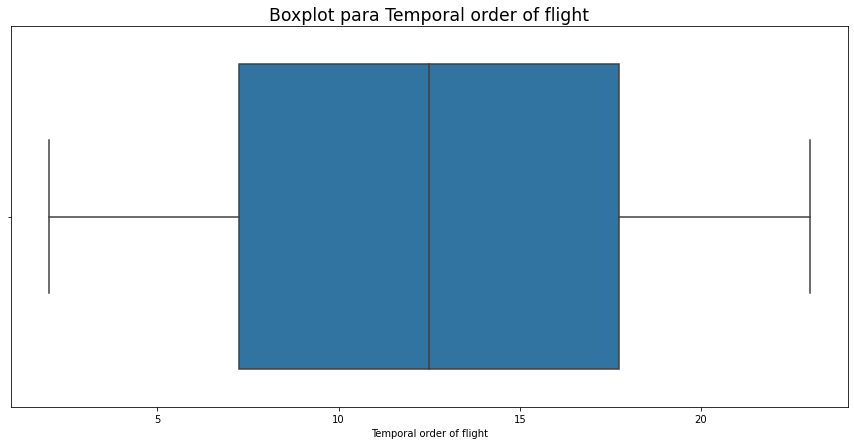

In [395]:
boxplot(my_data,"Temporal order of flight" )

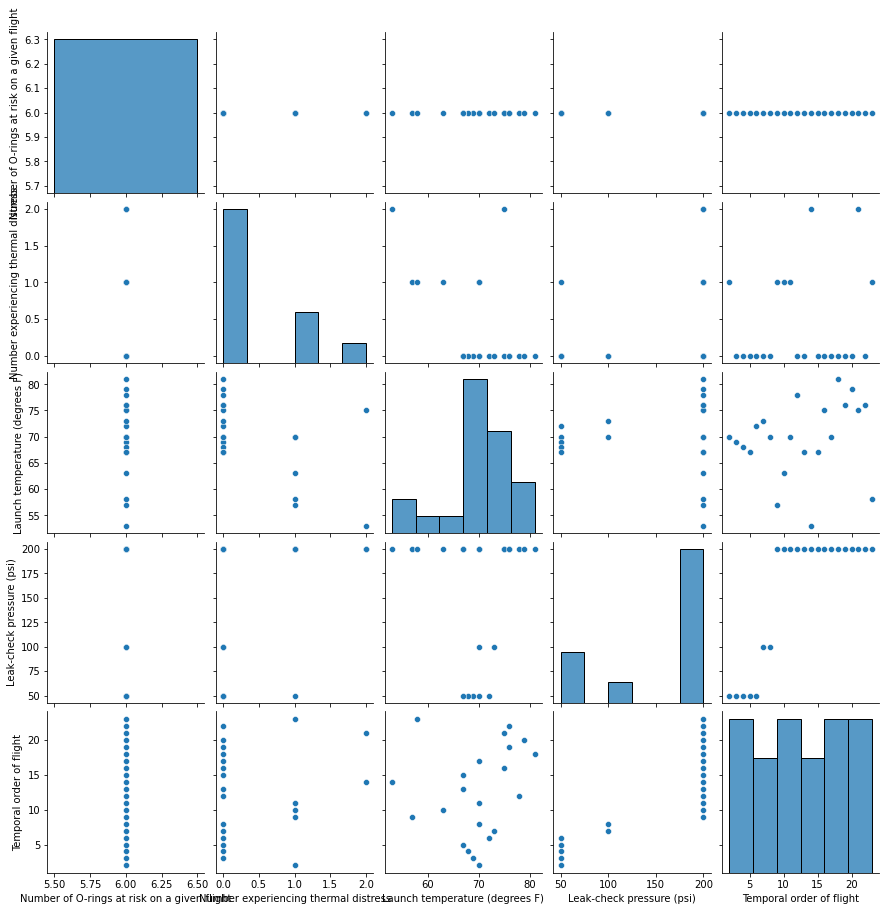

In [396]:
sns.pairplot(my_data)

In [397]:
def histograma(df, variable):
    plt.figure(figsize=(10,5))
    plt.title("Histograma de la {}".format(variable))
    sns.histplot(x=variable, data= df)

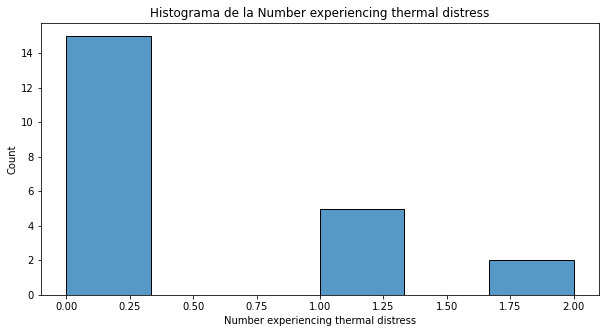

In [398]:
histograma(my_data,"Number experiencing thermal distress")

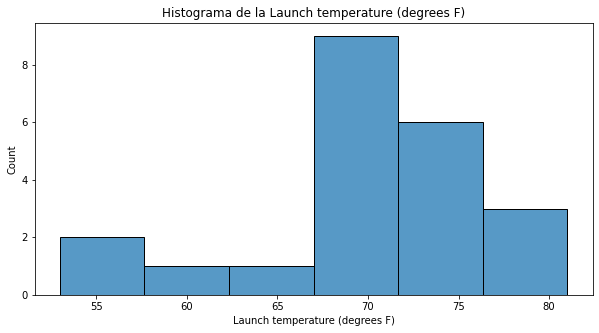

In [399]:
histograma(my_data,"Launch temperature (degrees F)")

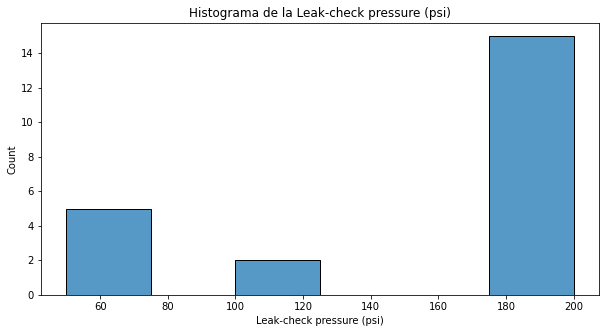

In [400]:
histograma(my_data,"Leak-check pressure (psi)")

In [401]:
def visualizar_variables_categoricas(data,variable):
    import pandas as pd
    frecuencia_= data[variable].value_counts()
    freq_= pd.DataFrame(frecuencia_).reset_index()
    freq_.columns= [variable, 'frecuencia']

    plt.figure(figsize=(15,7))
    plt.xticks(rotation=35)
    sns.barplot(x= variable, y= 'frecuencia', data = freq_)
    #plt.subplot(2,2, index+1)
    plt.title("Frecuencia de {}".format(variable))
    plt.xlabel(variable)
    plt.ylabel("frecuencia")
    plt.show()

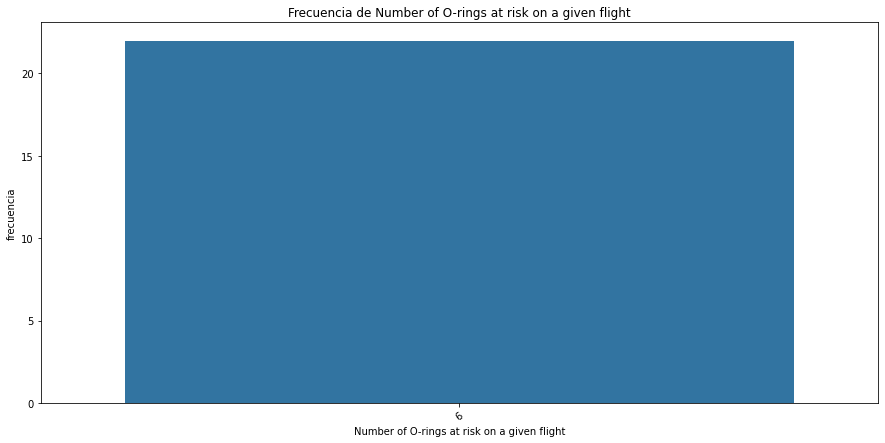

In [402]:
visualizar_variables_categoricas(my_data,'Number of O-rings at risk on a given flight')

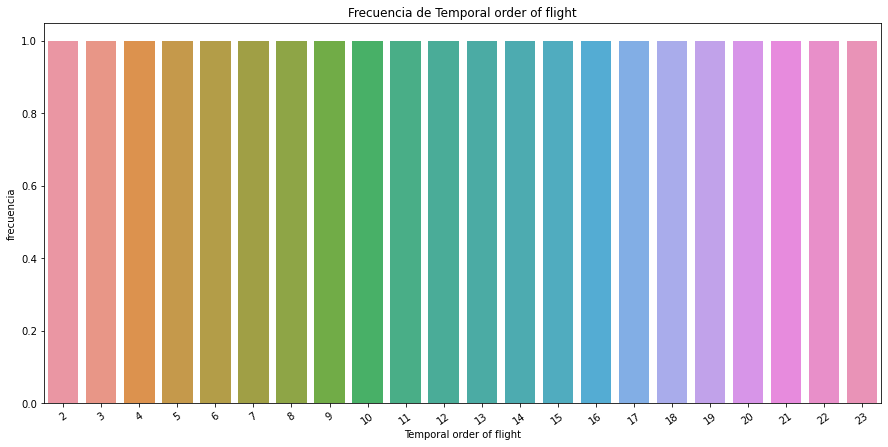

In [403]:
visualizar_variables_categoricas(my_data,'Temporal order of flight')

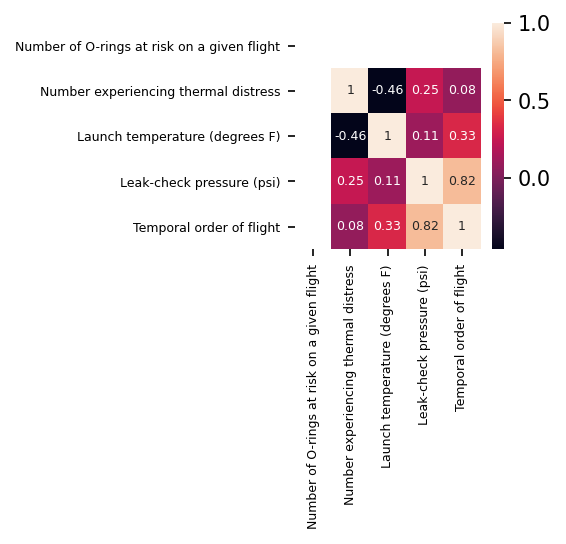

In [404]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2), dpi = 150) 

sns.heatmap(my_data.corr(method='spearman').round(2), annot=True, annot_kws={"size": 6})

plt.tick_params(axis = 'x', labelsize = 6) # x font label size
plt.tick_params(axis = 'y', labelsize = 6) # y font label size

In [405]:
# División de los datos en train y test

X = my_data.drop(columns=['Number of O-rings at risk on a given flight'],axis=1)
y = my_data['Number of O-rings at risk on a given flight']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [406]:
X.shape

(22, 4)

In [407]:
y.shape

(22,)

In [408]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Escalamos el dataset de entrenamiento haciendo un fit y transform del scaler
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

# Transformamos el dataset de test (no hacemos fit)
X_test= x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [441]:
#¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
pca = PCA(n_components=0.94, random_state=RANDOM_STATE).fit(X_train)
X_pca = pca.transform(X_train)

In [445]:
# Cantidad de componentes necesarios
X_pca.shape[1]

3

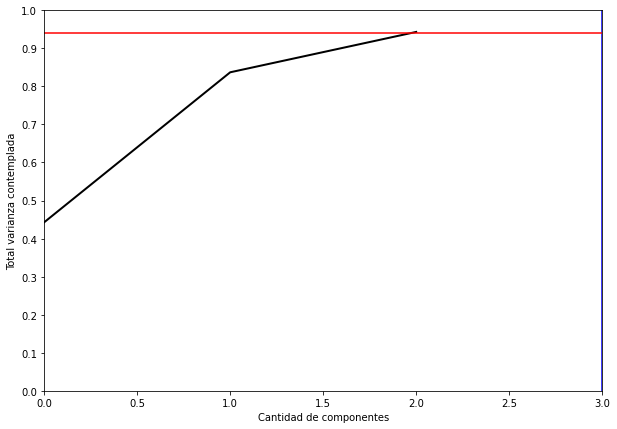

In [450]:
#Gráficar la variación acumulada para cada caso.
pca_2 = PCA(n_components=3, random_state=RANDOM_STATE).fit(X_train)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3, c='b')
plt.axhline(0.94, c='r')
plt.show();

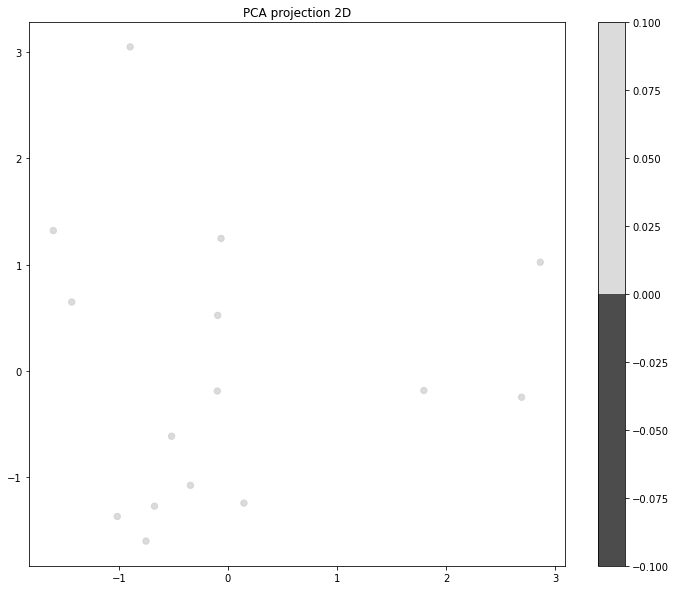

In [452]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('PCA projection 2D');

Para comenzar, determinamos los tipos de datos de las variables:

* Number of O-rings at risk on a given flight, Temporal order of flight: son variables categoricas.  

* Number experiencing thermal distress, Launch temperature (degrees F), Leak-check pressure (psi): son variables numéricas continuas.                     

Las varibles de entrada son [Number experiencing thermal distress, Launch temperature (degrees F), Leak-check pressure (psi), Temporal order of flight]. La variable de salida es Number of O-rings at risk on a given flight.

Análisis exploratorio de las variables de entrada:

*  Se observa que las variables no tienen datos nulos. Razón por lo cual no es necesario uzar técnicas de imputación para datos nulos.
*  Number experiencing thermal distress tiene los dos primero cuartiles en 0.0, con una std 0.0 con respecto a las media de 6. En el boxplot se observa que el 75% de los datos esta concentrado hasta el valor 1.0, no se observan valores extremos, también se observa un skewness positivo. 
* Launch temperature (degrees F) el 75% de los datos estan concentrados hasta los 75 grados F. En el boxplot se observan pocos valores extremos, también se observa un skewness negativo. 
* Leak-check pressure (psi) se observa que el 75% de los datos estan hasta 200. En el boxplot  no se observan  valores extremos, también se observa un skewness negativo. 
* Temporal order of flight e observa que el 75% de los datos estan hasta 17.5. En el boxplot  no se observan  valores extremos, se observa una distribución cercana a la normal. 
* EL >= 94% de la variabilidad se explica con el 94% de los datos, esto con tres componente. A partir de 95% de variabilidad de los datos se necesitan cuatros componentes. El PCA se usó a efectos de visalización, dado que al tener tan pocas variables de entrada no se requiere hacer disminución de las dimensiones. En la gráfica de las dos primeras componentes no se observan definidas ambas componentes, sólo se observa una.
* En la matriz de correlación usando el metodo de spearman se evidencia que Leak-check pressure (psi) y Temporal order of flight tienen alta correlación. Se decide no realizar la eliminación de alguna de estas dado que no vamos por esta entrega a aplicar ninguna tecnica de selección de variables.




# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [409]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

### ElasticNet

In [415]:
ElasticNet1 = ElasticNet(
            #l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            #alpha         = np.logspace(-10, 3, 200),
            fit_intercept= False,
            random_state= 1234
            
         )
ElasticNet_modelo = ElasticNet1.fit(X = X_train, y = y_train.flatten())

In [416]:
# Predicciones test
predicciones = ElasticNet_modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [417]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 0.0


In [418]:
R2 = metrics.r2_score(y_test, predicciones)
R2

1.0

### ElasticNetCV

In [ ]:
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train.flatten())

In [ ]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
0,0.00,1.000000e+03,0.0,0.0
937,0.90,1.122668e-06,0.0,0.0
936,0.90,1.304902e-06,0.0,0.0
935,0.90,1.516717e-06,0.0,0.0
934,0.90,1.762914e-06,0.0,0.0
...,...,...,...,...
463,0.50,7.663411e-02,0.0,0.0
462,0.50,8.907355e-02,0.0,0.0
461,0.50,1.035322e-01,0.0,0.0
469,0.50,3.107866e-02,0.0,0.0


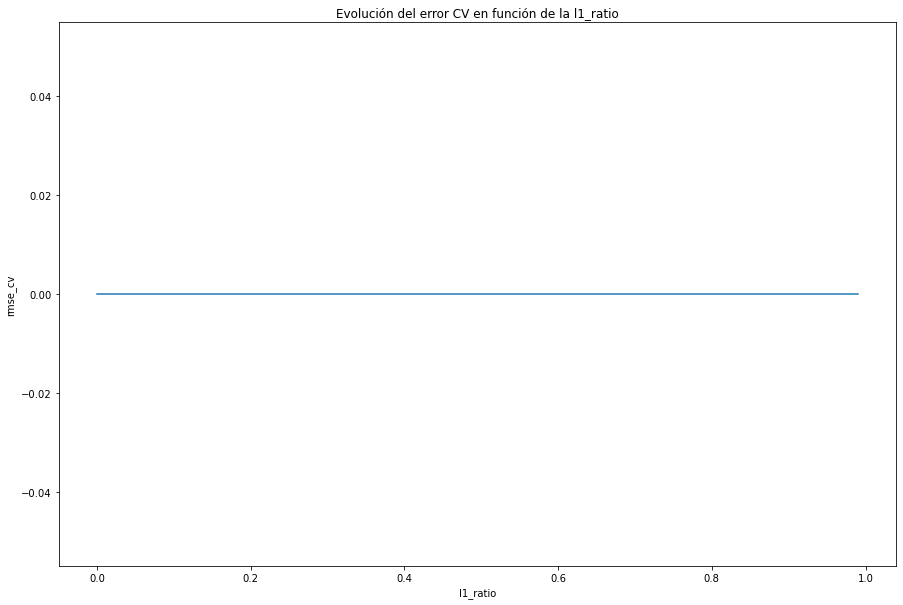

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 1000.0
Mejor valor de l1_ratio encontrado: 0.0


In [ ]:
# Predicciones test

predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [ ]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 0.0


In [ ]:
R2 = metrics.r2_score(y_test, predicciones)
R2

1.0

Se observa que el valor de R2 indica un ajuste perfecto y por tanto los modelos ElasticNet y ElasticNetCV son modelos que predijeron los datos con precisión 100%. 

### LogisticRegression

In [ ]:
y_train

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
logistic_regression_cv = LogisticRegressionCV()
logistic_regression_model= logistic_regression_cv.fit(X= X_train, y=y_train.flatten())

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [ ]:
# Hacer el fit del modelo con los HPs seleccionados
logistic_regression = LogisticRegression(
#intercept_scaling= [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
#random_state= 1234,
#verbose= 1

)
logistic_regression_model= logistic_regression.fit(X= X_train, y=y_train.flatten())
#print(logistic_regression_model.model)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

Dado que no tenemos y_train solo tiene la clase 0.0, pero el clasificador del modelo necesita 2 o más clases en nuestro vector de salida y_train, no es posible aplicar los modelos LogisticRegression y LogisticRegressionCV. Dado que el vector de salida tiene solo ceros, el clasificador no necesita hacer ningún trabajo, ya que todas las predicciones deberían ser solo una clase. 

En consclusión dado que nuestro conunto de datos tiene una sola clase "6" , ya la predicción corresponde a solo esa clase.

### SGDClassifier

In [ ]:
SGDClassifier = SGDClassifier()
SGDClassifier_model= SGDClassifier.fit(X= X_train, y=y_train.flatten())

ValueError: The number of classes has to be greater than one; got 1 class

Dado que uno de los clasificadores lineales del modelo es la regresión logística, este modelo también necesita dos o mas clases en el vector objetivo para predecir.

### SGDRegressor

In [ ]:
X.shape

(22, 4)

In [ ]:
SGDRegressor1 = SGDRegressor(
    penalty= "elasticnet",
    fit_intercept= False,
    random_state=1234,
    average= True

)
SGDRegressor_model= SGDRegressor1.fit(X= X_train, y=y_train.flatten())

In [ ]:
# Predicciones test
predicciones = SGDRegressor_model.predict(X=X_test)
predicciones = predicciones.flatten()

In [ ]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 0.0


In [ ]:
R2 = metrics.r2_score(y_test, predicciones)
R2

1.0

Se uso como parametro de penalización a elasticnet, esto por cuanto el modelo elasticnet tuve excelente metrica de predicción del vestor objetino. A través de la aplicación del modelo SGDRegressor se observa el comportamiento similar al ElasticNetCv, esto por cuanto la predicción del vector objetiva es 100% acertada con respecto al vector de datos originales.